## SIRD model for modeling outbreak

The Within the simplest model of the evolution of an epidemic outbreak, people can be divided into
different classes (species). In the susceptible (S), infected (I), recovered (R), dead (D) scheme
(SIRD), any individual in the fraction of the overall population that will eventually get sick belongs
to one of the aforementioned classes.

The SIRD model is explained in the pre-print from [Fnelli et Piazza](https://www.researchgate.net/publication/339943580_Analysis_and_forecast_of_COVID-19_spreading_UPDATE)

How to implement differential equations in python : 
https://www.youtube.com/watch?time_continue=329&v=VV3BnroVjZo&feature=emb_logo


$$
\frac{dS}{dt}=-rSI \\
\frac{dI}{dt}=rSI - (a+d)I
$$

### Implementing $S$

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 11000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.209, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T




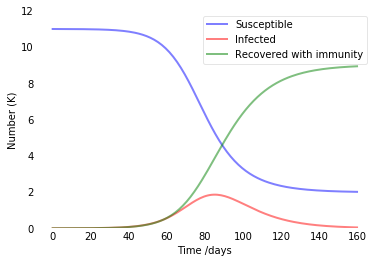

In [14]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (K)')
ax.set_ylim(0,12)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

array([[1.09990000e+04, 1.09987777e+04, 1.09985297e+04, 1.09982530e+04,
        1.09979442e+04, 1.09975996e+04, 1.09972151e+04, 1.09967860e+04,
        1.09963073e+04, 1.09957731e+04, 1.09951771e+04, 1.09945121e+04,
        1.09937702e+04, 1.09929423e+04, 1.09920187e+04, 1.09909883e+04,
        1.09898387e+04, 1.09885563e+04, 1.09871257e+04, 1.09855299e+04,
        1.09837498e+04, 1.09817643e+04, 1.09795499e+04, 1.09770802e+04,
        1.09743261e+04, 1.09712550e+04, 1.09678308e+04, 1.09640133e+04,
        1.09597578e+04, 1.09550145e+04, 1.09497283e+04, 1.09438380e+04,
        1.09372756e+04, 1.09299659e+04, 1.09218256e+04, 1.09127622e+04,
        1.09026739e+04, 1.08914481e+04, 1.08789605e+04, 1.08650744e+04,
        1.08496394e+04, 1.08324903e+04, 1.08134463e+04, 1.07923097e+04,
        1.07688650e+04, 1.07428777e+04, 1.07140937e+04, 1.06822385e+04,
        1.06470170e+04, 1.06081129e+04, 1.05651892e+04, 1.05178892e+04,
        1.04658374e+04, 1.04086419e+04, 1.03458973e+04, 1.027718